## Домашняя работа по базовой математической статистике для Data scientist



## Справочная информация

Системы обмена велосипедами - это новое поколение традиционных пунктов проката велосипедов, в которых весь процесс, начиная с подписки, проката и возврата,
обратно, стал автоматическим. С помощью этих систем пользователь может легко арендовать велосипед в определенном месте и вернуться
обратно в другом месте. В настоящее время по всему миру существует около 500 программ обмена велосипедами, которые состоят из
более 500 тысяч велосипедов. Сегодня существует большой интерес к этим системам из-за их важной роли в дорожном движении,
проблемах окружающей среды и здоровья.

Помимо интересных приложений систем байкшеринга в реальном мире, характеристики данных, генери этими системами, делают их привлекательными для исследований. В отличие от других транспортных услуг, таких как автобус или метро, продолжительность
поездки, местоположение отправления и прибытия явно регистрируются в этих системах. Эта функция превращает систему обмена велосипедами в
виртуальную сенсорную сеть, которую можно использовать для определения мобильности в городе. Следовательно, ожидается, что большинство важных
событий в городе можно будет обнаружить с помощью мониторинга этих данных.руемых

## Набор данных


- season : season (1:springer, 2:summer, 3:fall, 4:winteo 23)
- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
eathersit : 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.special as sps
import warnings
from scipy.stats import kurtosis
from scipy.stats import skew

df = pd.read_csv("bikeshare.csv")
del df['datetime']

In [4]:
df.head(50)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


### 1.
Постройте гистограмму распределения каждой из метрик в датасете при помощи метода датафрейма `hist()`. При необходимости добавьте логарифмированную ось (параметр log).

array([[<Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'workingday'}>],
       [<Axes: title={'center': 'weather'}>,
        <Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>],
       [<Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'casual'}>],
       [<Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'count'}>, <Axes: >]], dtype=object)

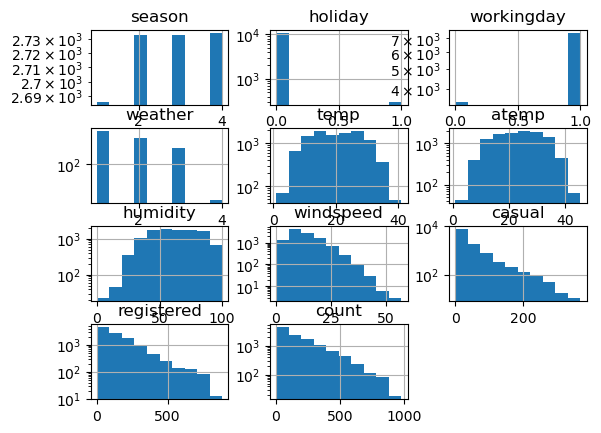

In [2]:
df.hist(log=True)

Согласно построенным гистограммам мы можем наблюдать что в праздничные дни количество заказов гораздо меньше чем в будни также это заметно на гистограмме зависимости рабочих и выходных дней, соответственно можно утверждать что клиенты используют аренду в основном для перемещения к месту работы и обратно. 
Также очень маленький процент клиентов используют аренду при сильном дожде и довольно внушительный при средней температуре воздуха.  С увеичением скорости ветра количество арендованных велосипедов постепенно снижается.

### 2.
Для каждой метрики найдите среднее, дисперсию, 50, 75 и 99 перцентили, моду. Какие выводы о наличии аномалий мы можем сделать?

In [4]:
df.describe(percentiles = [0.5, 0.75, 0.99]).round(2)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00,10886.00,10886.00,10886.00,10886.00,10886.00,10886.00,10886.00,10886.00,10886.00,10886.00
mean,2.51,0.03,0.68,1.42,20.23,23.66,61.89,12.80,36.02,155.55,191.57
std,1.12,0.17,0.47,0.63,7.79,8.47,19.25,8.16,49.96,151.04,181.14
min,1.00,0.00,0.00,1.00,0.82,0.76,0.00,0.00,0.00,0.00,1.00
50%,3.00,0.00,1.00,1.00,20.50,24.24,62.00,13.00,17.00,118.00,145.00
75%,4.00,0.00,1.00,2.00,26.24,31.06,77.00,17.00,49.00,222.00,284.00
99%,4.00,1.00,1.00,3.00,36.08,40.15,100.00,35.00,240.15,697.00,774.15
max,4.00,1.00,1.00,4.00,41.00,45.46,100.00,57.00,367.00,886.00,977.00


In [5]:
# Дисперсия
df.std()**2 

season            1.245845
holiday           0.027755
workingday        0.217304
weather           0.401751
temp             60.708872
atemp            71.818856
humidity        370.371306
windspeed        66.659670
casual         2496.049219
registered    22812.789514
count         32813.313153
dtype: float64

In [6]:
# Мода
df.mode()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,4,0,1,1,14.76,31.06,88,0.0,0,3,5


### 3. (*) 
 Для каждой метрики проанализируйте ассиметрию и смещенность распределения – для этого посчитайте для каждой метрики коэффициент ассиметрии и эксцесса.

In [7]:
### YOUR CODE HERE ###
print("Эксцесс")
print(df.kurtosis())
print("------------------------------------")
print("Ассиметрия")
print(df.skew())
print("------------------------------------")

Эксцесс
season        -1.355661
holiday       30.046975
workingday    -1.397828
weather        0.395533
temp          -0.914530
atemp         -0.850076
humidity      -0.759818
windspeed      0.630133
casual         7.551629
registered     2.626081
count          1.300093
dtype: float64
------------------------------------
Ассиметрия
season       -0.007076
holiday       5.660517
workingday   -0.776163
weather       1.243484
temp          0.003691
atemp        -0.102560
humidity     -0.086335
windspeed     0.588767
casual        2.495748
registered    1.524805
count         1.242066
dtype: float64
------------------------------------


 Мы имеем дело а ассиметричным распределением

### 4.

Постройте симметричный доверительный интервал для метрики с самой большой дисперсией при доверительной вероятности 0.95. 

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.special as sps
from scipy import *
import warnings
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy import stats
import statsmodels.api as sm

In [9]:
### YOUR CODE HERE ###
def my_norm_confidence(df=df, column = "atemp", alpha = 0.95):
    interval = stats.norm.interval(alpha, loc=df[column].mean(), scale=df[column].std())
    return interval

In [10]:
confidence = my_norm_confidence()
print(confidence)

(7.045172041641042, 40.26499606418295)


При доверительной вероятности 95 % средняя разница температуры (atemp) не выйдет за этот интервал. Отметим на графике полученный коридор.

Text(0.5, 1.0, 'Доверительный интервал')

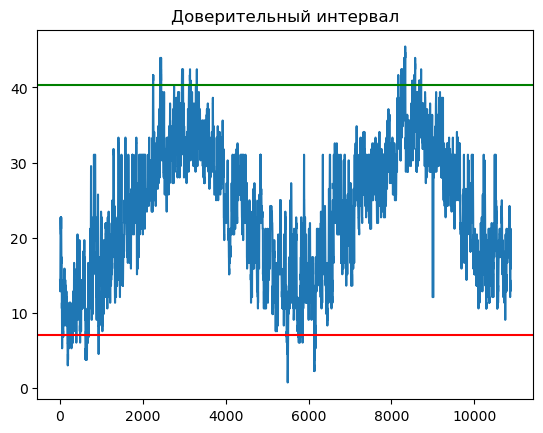

In [11]:
df['atemp'].plot()
plt.axhline(y=confidence[1], color="g", linestyle="-")
plt.axhline(y=confidence[0], color="r", linestyle="-")
plt.title("Доверительный интервал")

### 5. (*)

Найдите количество значений, выходящих за три сигмы для каждой из метрик. Где получилось больше всего аномалий?

In [23]:
data = pd.read_csv("bikeshare.csv")
del data['datetime']

In [24]:
# Находим среднее и стандартное отклонение
mean = data.mean()
std = data.std()

In [25]:
lower_bound = mean - 3*std
upper_bound = mean + 3*std

In [26]:
# Выявляем выбросы
outliers = data[(data < lower_bound) | (data > upper_bound)]

In [33]:
print("Количество выбросов:")
print(outliers.count())

Количество выбросов:
season          0
holiday       311
workingday      0
weather         1
temp            0
atemp           0
humidity       22
windspeed      67
casual        292
registered    235
count         147
dtype: int64


### 6.

Постройте корреляционную матрицу и heatmap по метрикам. Какие выводы о наличии связей можно сделать?

In [13]:
### YOUR CODE HERE ###

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.special as sps
import warnings
from scipy.stats import kurtosis
from scipy.stats import skew

df = pd.read_csv("bikeshare.csv")
del df['datetime']

In [14]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (10.0, 7.0)
warnings.filterwarnings("ignore")

In [15]:
research_list = ["season", "holiday", "workingday", "weather", "temp", "atemp", "humidity", "windspeed", "casual", "registered", "count"]

In [16]:
df[research_list].head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1


Постром матрицу парных корреляций для отобранных данных при помощи метода corr() pandas

In [17]:
corr_m = df[research_list].corr()

In [18]:
corr_m

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


Теперь визуализируем полученную матрицу при помощи seaborn heatmap

<Axes: >

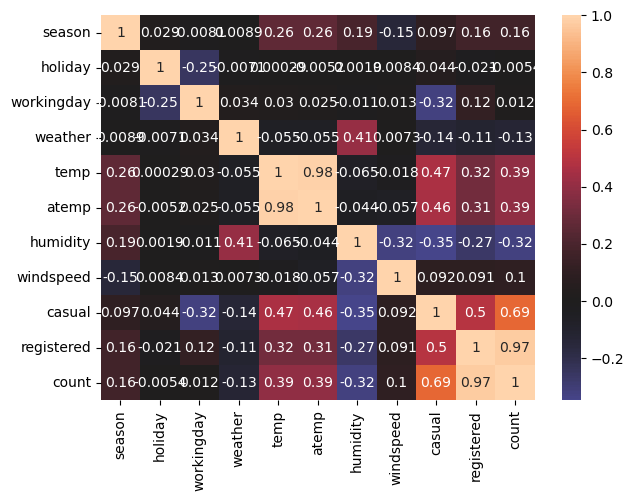

In [19]:
plt.figure(figsize=(7,5))
sns.heatmap(corr_m, center=0, annot=True)

Согласно корреляции 0.97 можно утверждать что больше пользуются услугами аренды зарегистрированные пользователи что говорит нам о том что стоит увеличить конвертацию мотивируя лидов совершить регистрацию. Также существует умеренная зависимость количества арендованных велосипедов от температуры воздуха (0.39).